# 📊 Netflix Content Insights — Business Analytics

🎬 **Netflix Content Insights — Business Analytics**

---

This project analyzes a Netflix movie dataset to uncover business trends and actionable insights.  
We use Python and popular data visualization tools to answer key questions about Netflix’s content library.  
The analysis covers content types, production countries, yearly trends, and content ratings.

---

Key questions include:  
Which genres are most prevalent on Netflix?  
Which countries produce the largest share of content?  
How has Netflix’s content evolved over the years?  
What are the most common ratings and typical durations?

---

Each row in the dataset represents a Netflix movie and includes the title, director, country of origin, release date, year, content rating, duration, and genre.

---

Let’s get started by loading and exploring the data!


In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

colors = ['#808080', '#8B0000']

df = pd.read_csv("E://Project//netflix1.csv")
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month


🔍 **Initial Data Inspection**

---

In this section, we first explore the structure of the dataset.We check the data types of each column.We also identify any missing values.These steps help us plan the right approach for data cleaning and further analysis.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   listed_in     8790 non-null   object        
 10  year_added    8790 non-null   int32         
 11  month_added   8790 non-null   int32         
dtypes: datetime64[ns](1), int32(2), int64(1), object(8)
memory usage: 755.5+ KB


In [11]:
missing_values = df.isnull().sum()
missing_values

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
year_added      0
month_added     0
dtype: int64

In [13]:
duplicate = df.duplicated().sum()
duplicate

0

🧹 **Data Cleaning**

---

In this section, we address missing values.We also correct data types for consistency.Finally, we remove any irrelevant or duplicate entries.  
Proper data cleaning is crucial to ensure accurate analysis and reliable results.


In [15]:
df.drop(columns="show_id", inplace=True)
df.head()

,type,title,director,country,date_added,release_year,rating,duration,listed_in,year_added,month_added
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,9
1,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,9
2,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",2021,9
3,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",2021,9
4,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021,9


🗂️ **Columns Descriptions**

---

type — Indicates whether the entry is a movie or a TV show.  
title — Name of the title.  
director — Name of the director.  
country — Production country of origin.  
date_added — Release date onto Netflix.  
release_year — Year the movie or TV show was released.  
rating — The content rating indicating suitability for different age groups (e.g., TV-MA, TV-14, R, PG-13, TV-PG, TV-Y, PG, TV-G, TV-Y7).  
duration — For movies, this is typically given in minutes; for TV shows, it indicates the number of seasons.  
listed_in — The genres or categories that the movie or TV show belongs to, showing its thematic content.


<p style="text-align:center; font-size:2em; font-weight:bold;">
📊 Data Visualization
</p>


<p style="text-align:left; font-size:1.5em; font-weight:bold;">
📺 Movies vs TV Shows Overview
</p>


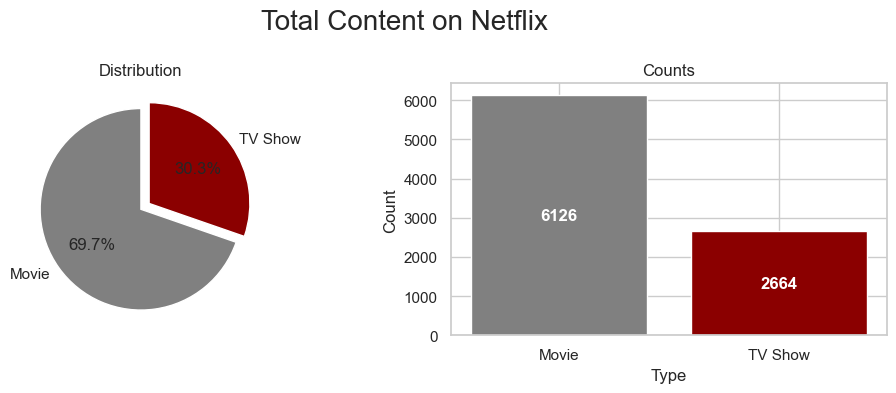

In [31]:
type_counts = df['type'].value_counts()
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Pie chart
axs[0].pie(
    type_counts,
    labels=type_counts.index,
    autopct='%1.1f%%',
    explode=[0, 0.1][:len(type_counts)],
    startangle=90,
    colors=colors
)
axs[0].set_title('Distribution')

# Bar chart
bars = axs[1].bar(type_counts.index, type_counts.values, color=colors)
axs[1].set_title('Counts')
axs[1].set_ylabel('Count')
axs[1].set_xlabel('Type')

# Add value labels on each bar (horizontally centered)
for bar in bars:
    axs[1].text(
        bar.get_x() + bar.get_width() / 2,   # X center
        bar.get_height() / 2,                # Y: half height for vertical centering (or bar.get_height()+1 for top)
        f"{int(bar.get_height())}",          # value (integer)
        ha='center', va='center', fontsize=12, fontweight='bold', color='white'
    )

plt.suptitle('Total Content on Netflix', fontsize=20)
plt.tight_layout()
plt.show()


<p style="text-align:left; font-size:1.5em; font-weight:bold;">
📅 Monthly Trend of Movie and TV Show Releases
</p>



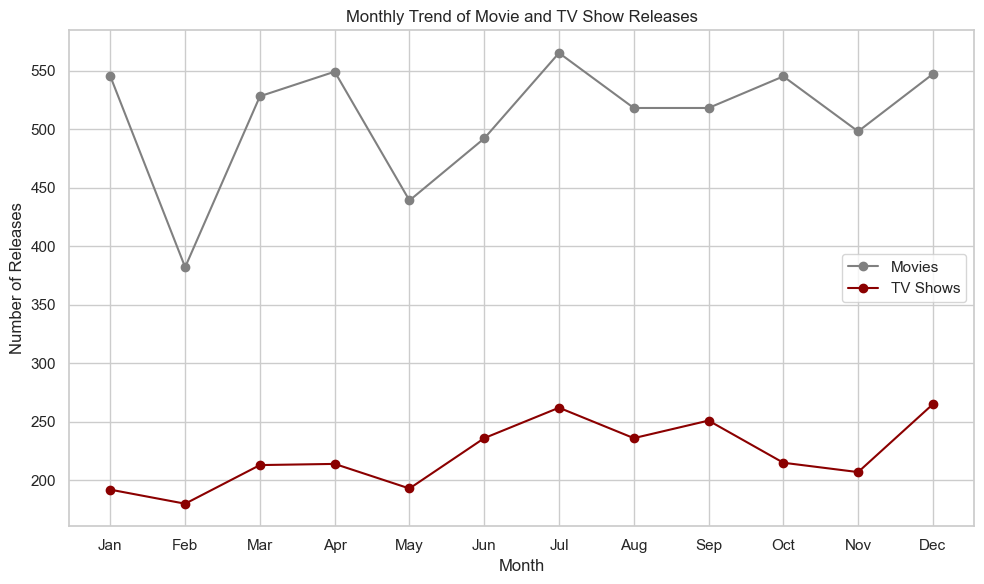

In [36]:
movie_monthly_counts = df[df['type'] == 'Movie']['month_added'].value_counts().sort_index()
tv_show_monthly_counts = df[df['type'] == 'TV Show']['month_added'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(
    movie_monthly_counts.index, 
    movie_monthly_counts.values, 
    label='Movies', 
    color=colors[0], 
    marker='o'
)
plt.plot(
    tv_show_monthly_counts.index, 
    tv_show_monthly_counts.values, 
    label='TV Shows', 
    color=colors[1], 
    marker='o'
)
plt.title('Monthly Trend of Movie and TV Show Releases')
plt.xlabel('Month')
plt.ylabel('Number of Releases')
plt.xticks(
    range(1, 13), 
    ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


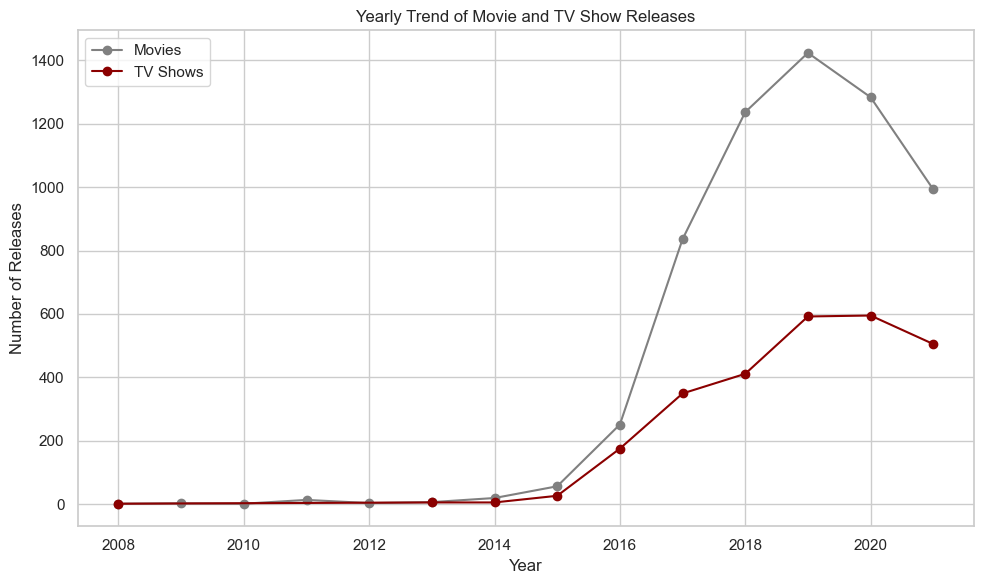

In [42]:
df['year_added'] = pd.to_datetime(df['date_added']).dt.year

movie_yearly_counts = df[df['type'] == 'Movie']['year_added'].value_counts().sort_index()
tv_show_yearly_counts = df[df['type'] == 'TV Show']['year_added'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(
    movie_yearly_counts.index,
    movie_yearly_counts.values,
    label='Movies',
    color=colors[0],
    marker='o'
)
plt.plot(
    tv_show_yearly_counts.index,
    tv_show_yearly_counts.values,
    label='TV Shows',
    color=colors[1],
    marker='o'
)
plt.title('Yearly Trend of Movie and TV Show Releases')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<p style="text-align:left; font-size:1.5em; font-weight:bold;">
🎬 Top 10 Movie & Show Categories
</p>


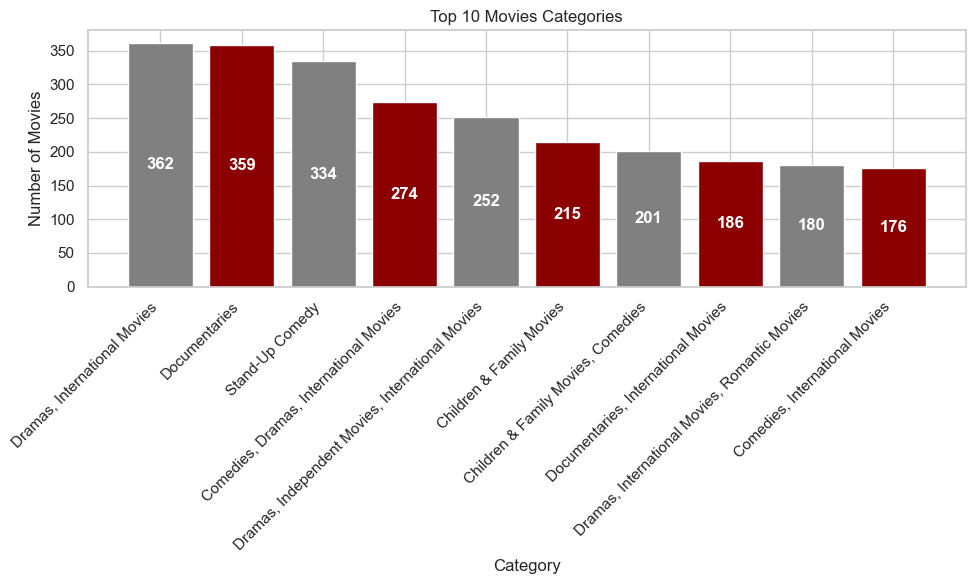

In [53]:
top_10_movies_by_category = df[df['type'] == 'Movie'].groupby('listed_in').size().nlargest(10)
top_10_movies_by_category = top_10_movies_by_category.reset_index(name='count')

plt.figure(figsize=(10, 6))
bars = plt.bar(
    top_10_movies_by_category['listed_in'],
    top_10_movies_by_category['count'],
    color=(colors * 10)[:len(top_10_movies_by_category['listed_in'])]
)

# Add value labels to each bar (centered, horizontal)
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,      # X: middle of the bar
        bar.get_height() / 2,                   # Y: middle (vertical center)
        f"{int(bar.get_height())}",              # Show integer value
        ha='center', va='center', fontsize=12, fontweight='bold', color='white'
    )

plt.title('Top 10 Movies Categories')
plt.xlabel('Category')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


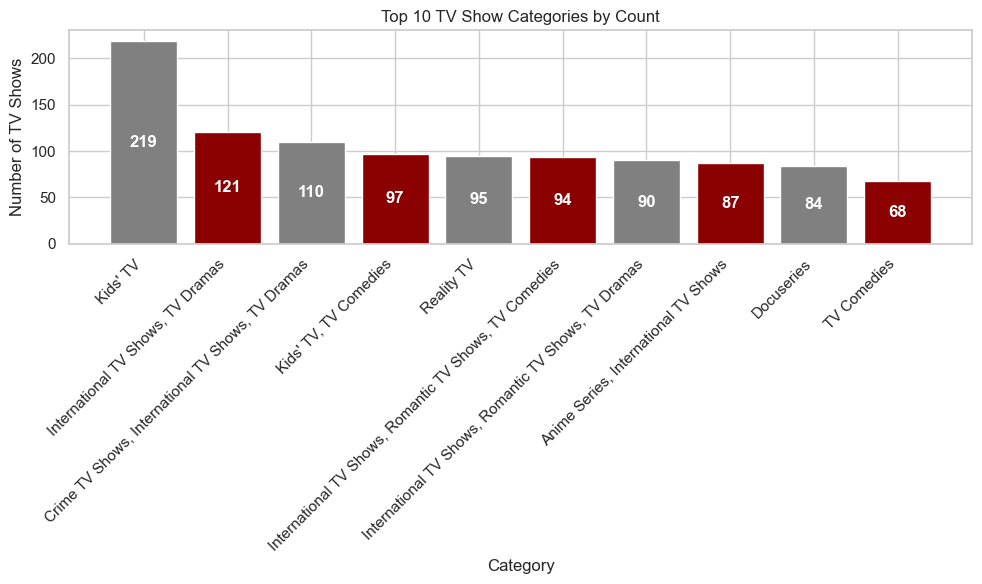

In [55]:
top_10_TVShow_by_category = df[df['type'] == 'TV Show'].groupby('listed_in').size().nlargest(10)
top_10_TVShow_by_category = top_10_TVShow_by_category.reset_index(name='count')

plt.figure(figsize=(10, 6))
bars = plt.bar(
    top_10_TVShow_by_category['listed_in'],
    top_10_TVShow_by_category['count'],
    color=(colors * 10)[:len(top_10_TVShow_by_category['listed_in'])]
)

# Add value labels to each bar (centered, horizontal)
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,      # X: middle of the bar
        bar.get_height() / 2,                   # Y: vertical center
        f"{int(bar.get_height())}",             # Show integer value
        ha='center', va='center', fontsize=12, fontweight='bold', color='white'
    )

plt.title('Top 10 TV Show Categories by Count')
plt.xlabel('Category')
plt.ylabel('Number of TV Shows')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



<p style="text-align:left; font-size:1.5em; font-weight:bold;">
🌍 Top 10 Countries with Netflix Content
</p>


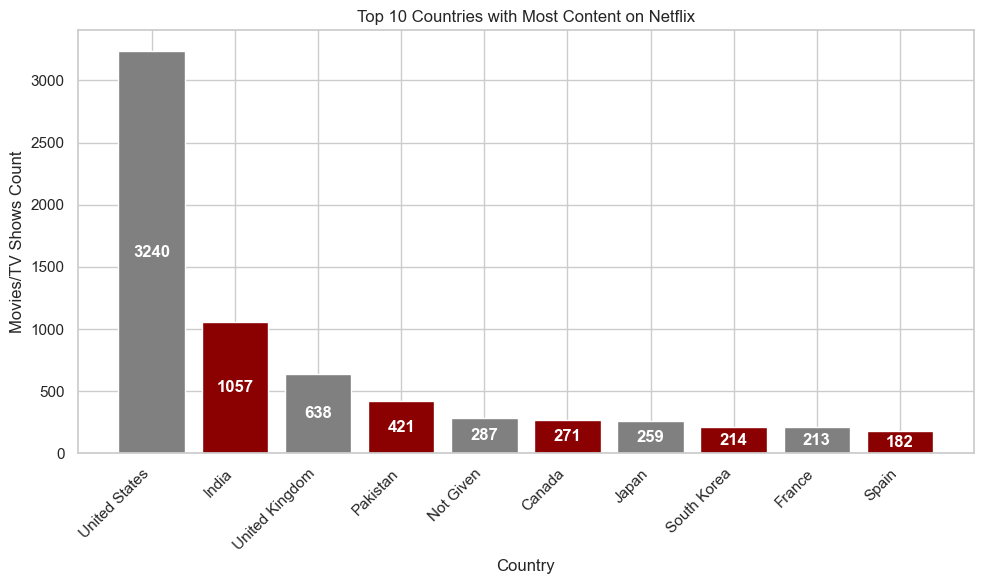

In [58]:
top_countries = df['country'].value_counts().head(10)
top_countries = top_countries.reset_index()
top_countries.columns = ['country', 'count']

plt.figure(figsize=(10, 6))
bars = plt.bar(
    top_countries['country'],
    top_countries['count'],
    color=(colors * 10)[:len(top_countries['country'])]
)

# Add value labels to each bar (centered, horizontal)
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() / 2,
        f"{int(bar.get_height())}",
        ha='center', va='center', fontsize=12, fontweight='bold', color='white'
    )

plt.title('Top 10 Countries with Most Content on Netflix')
plt.xlabel('Country')
plt.ylabel('Movies/TV Shows Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<p style="text-align:left; font-size:1.5em; font-weight:bold;">
🎬 Top 10 Directors by Number of Works
</p>


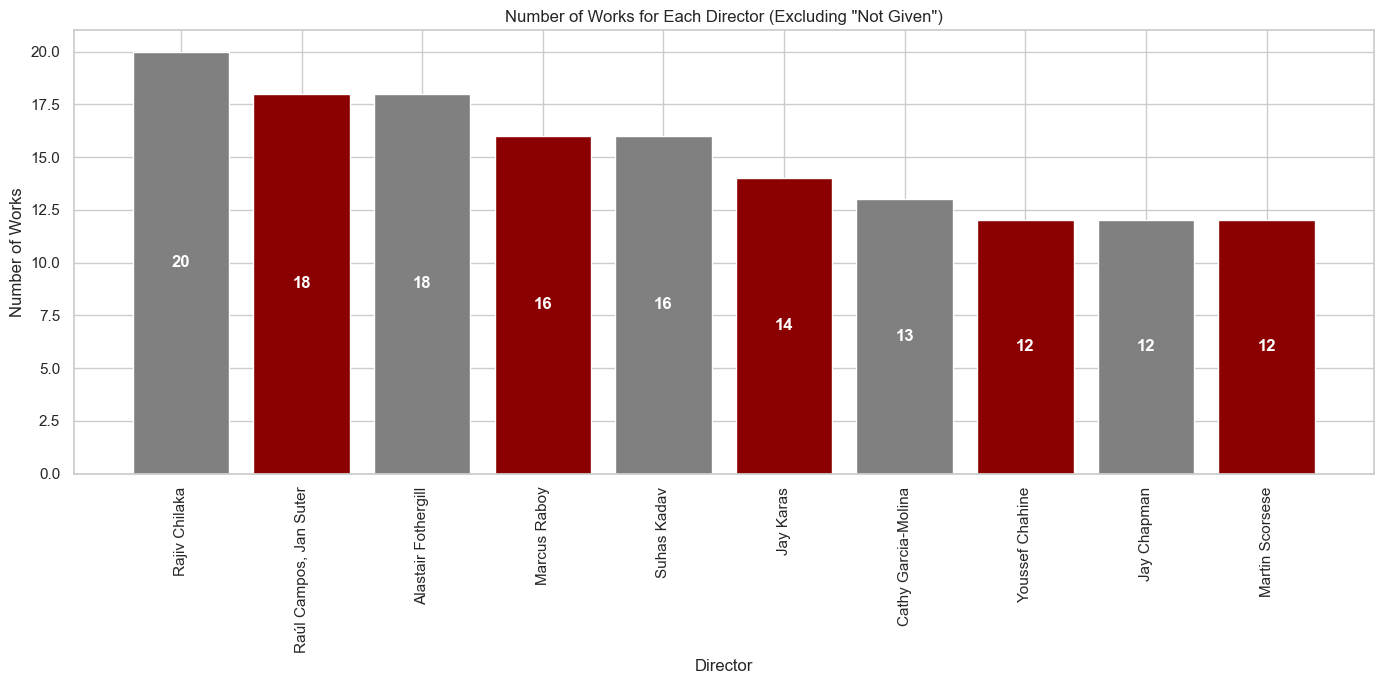

In [61]:
director_filtered = df[df['director'] != 'Not Given']
director_counts = director_filtered['director'].value_counts().head(10)

plt.figure(figsize=(14, 7))
bars = plt.bar(
    director_counts.index,
    director_counts.values,
    color=(colors * 10)[:len(director_counts.index)]
)

# Add value labels to each bar (centered, horizontal)
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() / 2,
        f"{int(bar.get_height())}",
        ha='center', va='center', fontsize=12, fontweight='bold', color='white'
    )

plt.title('Number of Works for Each Director (Excluding "Not Given")')
plt.xlabel('Director')
plt.ylabel('Number of Works')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


<p style="text-align:left; font-size:1.5em; font-weight:bold;">
📊 Content Type Distribution
</p>


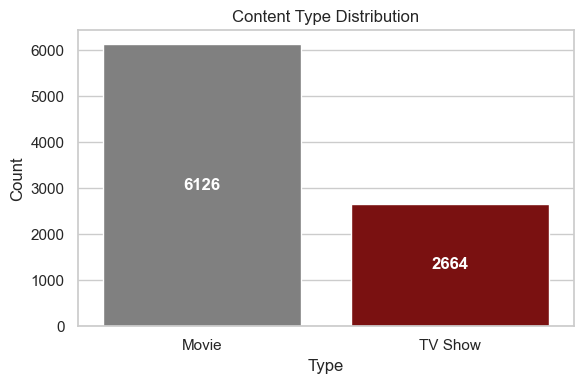

In [67]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x='type', hue='type', legend=False, palette=colors)
plt.title('Content Type Distribution')
plt.xlabel('Type')
plt.ylabel('Count')

# Add value labels (centered in each bar)
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,
        p.get_height() / 2,
        f"{int(p.get_height())}",
        ha='center', va='center', fontsize=12, fontweight='bold', color='white'
    )

plt.tight_layout()
plt.show()



<p style="text-align:left; font-size:1.5em; font-weight:bold;">
🌎 Top 50 Countries by Netflix Content Count
</p>


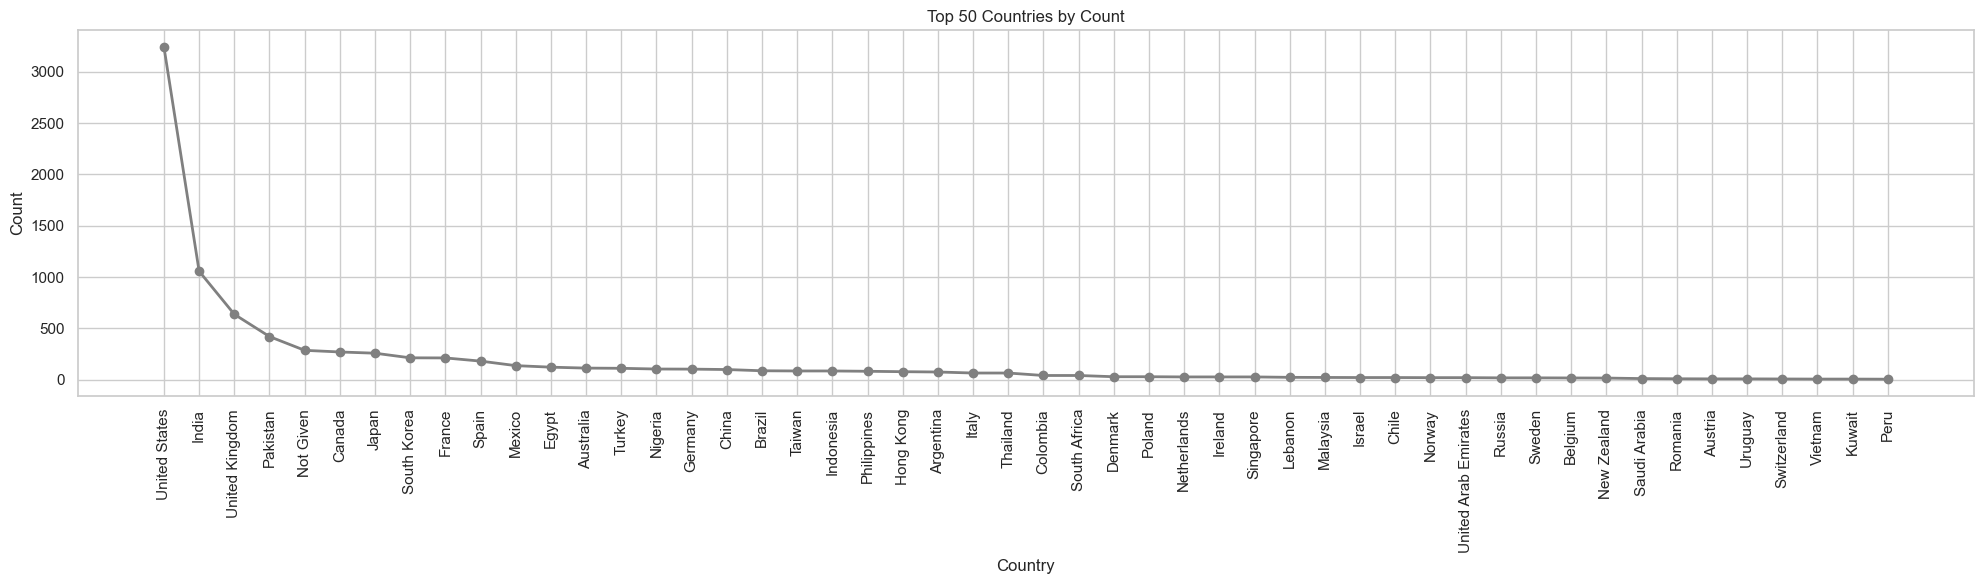

In [70]:
country_counts = df['country'].value_counts()
country_df = country_counts.reset_index()
country_df.columns = ['country', 'count']
country_df = country_df.sort_values(by='count', ascending=False).head(50)

plt.figure(figsize=(20, 6))
plt.plot(
    country_df['country'],
    country_df['count'],
    marker='o',
    linestyle='-',
    linewidth=2,
    color=colors[0]
)
plt.xticks(rotation=90)
plt.title('Top 50 Countries by Count')
plt.xlabel('Country')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


<p style="text-align:left; font-size:1.5em; font-weight:bold;">
⏱️ Distribution of Duration for Movies and TV Shows
</p>


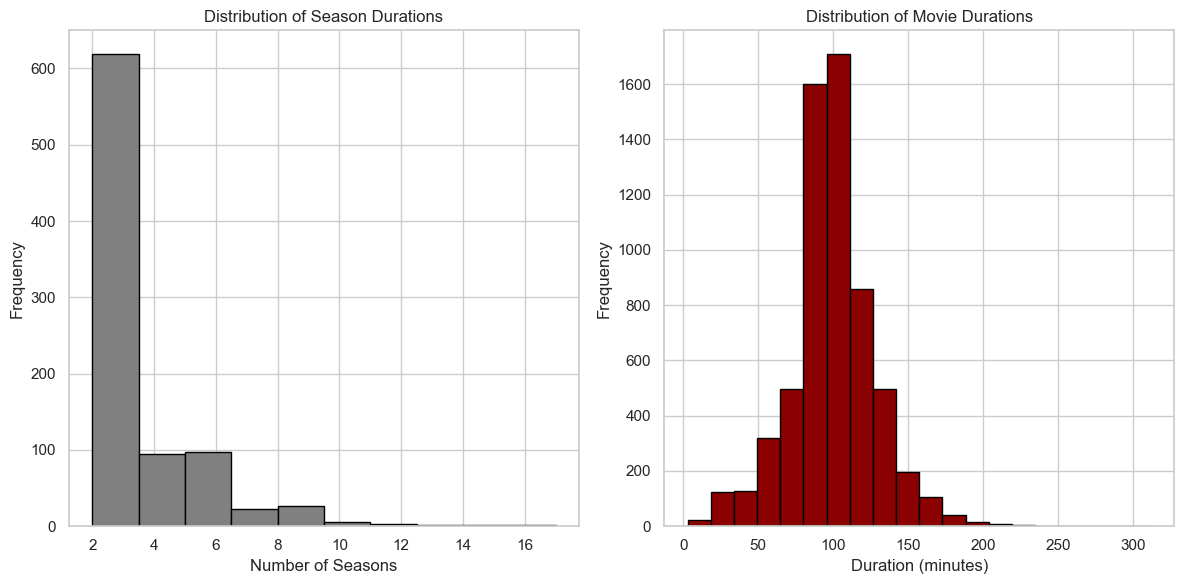

In [73]:
# Split 'duration' into 'value' and 'type'
df[['value', 'type']] = df['duration'].str.split(' ', expand=True)
df['value'] = df['value'].astype(int)

plt.figure(figsize=(12, 6))

# Distribution for TV Shows (number of seasons)
plt.subplot(1, 2, 1)
plt.hist(df[df['type'] == 'Seasons']['value'], bins=10, edgecolor='black', color=colors[0])
plt.title('Distribution of Season Durations')
plt.xlabel('Number of Seasons')
plt.ylabel('Frequency')

# Distribution for Movies (minutes)
plt.subplot(1, 2, 2)
plt.hist(df[df['type'] == 'min']['value'], bins=20, edgecolor='black', color=colors[1])
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


<p style="text-align:left; font-size:1.5em; font-weight:bold;">
⭐ Distribution of Ratings
</p>


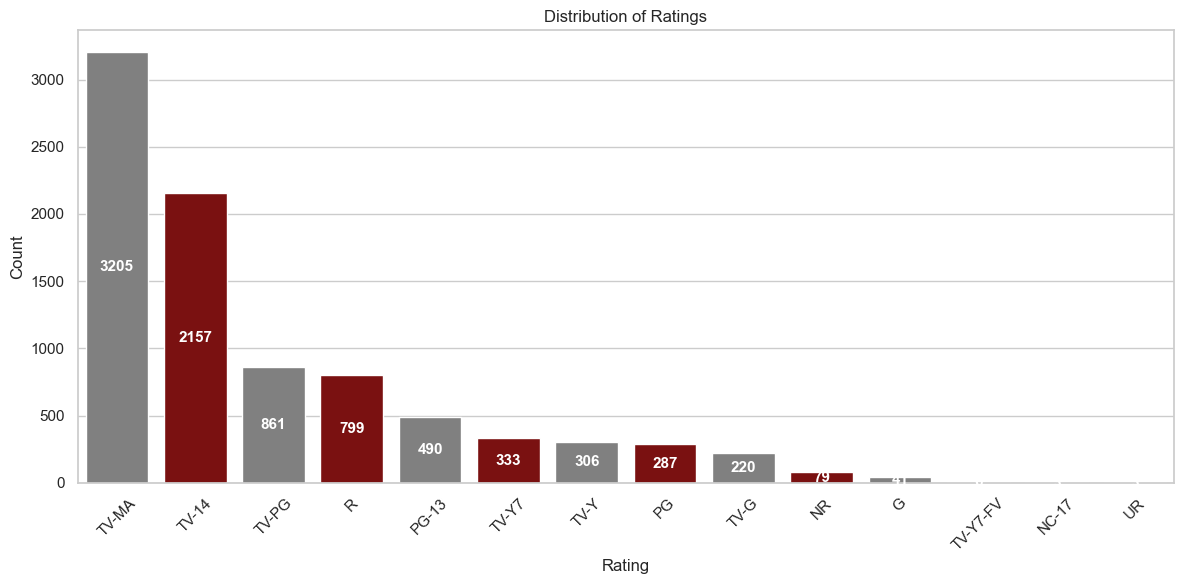

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

ratings_order = df['rating'].value_counts().index.tolist()
colors_cycle = (colors * ((len(ratings_order) // len(colors)) + 1))[:len(ratings_order)]
palette_dict = dict(zip(ratings_order, colors_cycle))

plt.figure(figsize=(12, 6))
ax = sns.countplot(
    x='rating',
    data=df,
    hue='rating',         
    dodge=False,          
    order=ratings_order,
    palette=palette_dict,
    legend=False          
)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,
        p.get_height() / 2,
        int(p.get_height()),
        ha='center', va='center', fontsize=11, fontweight='bold', color='white'
    )

plt.tight_layout()
plt.show()


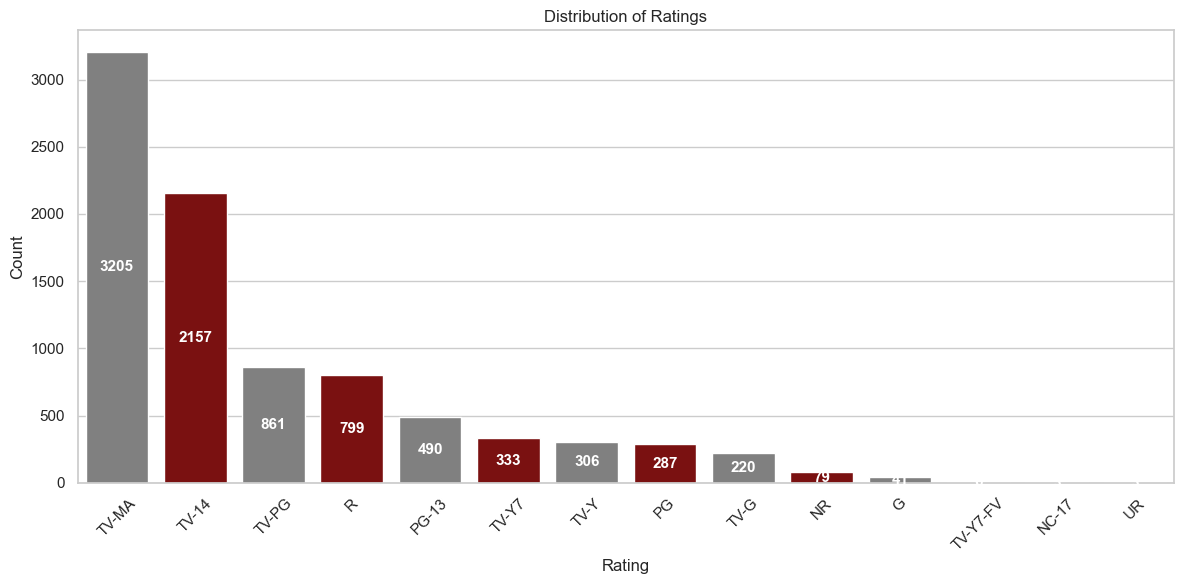

In [98]:


ratings_order = df['rating'].value_counts().index.tolist()
colors_cycle = (colors * ((len(ratings_order) // len(colors)) + 1))[:len(ratings_order)]
palette_dict = dict(zip(ratings_order, colors_cycle))

plt.figure(figsize=(12, 6))
ax = sns.countplot(
    x='rating',
    data=df,
    hue='rating',
    dodge=False,
    order=ratings_order,
    palette=palette_dict,
    legend=False
)

plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,
        p.get_height() / 2,
        int(p.get_height()),
        ha='center',
        va='center',
        fontsize=11,
        fontweight='bold',
        color='white'
    )

plt.tight_layout()
plt.show()


## 🎭 Most Common Genres (Top 10)

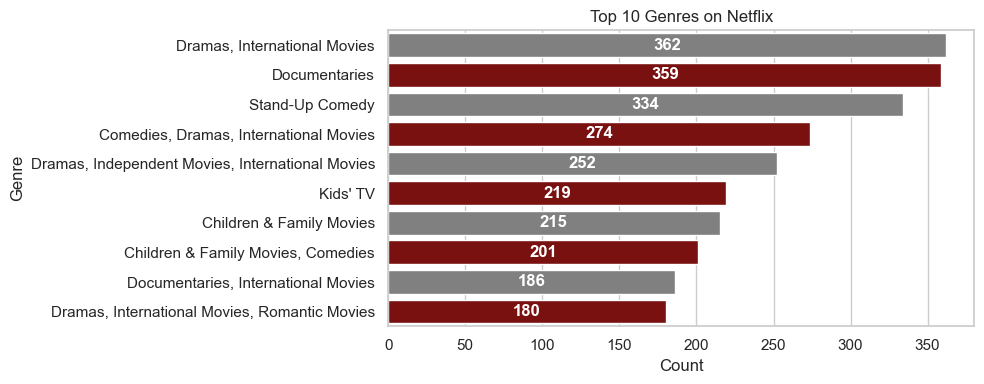

In [88]:
plt.figure(figsize=(10, 4))
ax = sns.barplot(
    x=counts,
    y=genres,
    hue=genres,            # اضافه کردن hue
    palette=(colors * 10)[:len(genres)],
    legend=False           # حذف لگند
)
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.tight_layout()

for p in ax.patches:
    ax.text(
        p.get_width() / 2, p.get_y() + p.get_height() / 2,
        int(p.get_width()),
        ha='center', va='center', color='white', fontsize=12, fontweight='bold'
    )

plt.show()
